カブを予測する

1.データ読み込み

In [0]:
import numpy as np
import pandas as pd

dir = ''

#テーブル読み込み
df = pd.read_csv(directory+'data/oimori.csv')

print(df)

        買値   月曜午前  月曜午後  火曜午前   火曜午後  ...   金曜午前   金曜午後   土曜午前   土曜午後          結果
0     79.0    NaN  72.0   NaN   69.0  ...    NaN   55.0    NaN   50.0        じりびん
1     99.0    NaN  73.0   NaN   74.0  ...    NaN  136.0    NaN  194.0  ゆるやかじょうしょう
2     94.0    NaN  70.0   NaN   64.0  ...    NaN    NaN    NaN    NaN        じりびん
3     96.0    NaN  86.0   NaN   66.0  ...    NaN   89.0    NaN   97.0       つうじょう
4    109.0    NaN  83.0  83.0   81.0  ...    NaN  147.0  155.0  188.0       つうじょう
..     ...    ...   ...   ...    ...  ...    ...    ...    ...    ...         ...
374  103.0  111.0  75.0  67.0   41.0  ...   45.0   82.0  115.0  138.0       つうじょう
375   96.0   76.0  73.0  71.0   68.0  ...  135.0  156.0  170.0  149.0  じりびんふぃーばー４
376  101.0   80.0  78.0  75.0   72.0  ...   60.0   58.0   54.0   52.0        じりびん
377   92.0   72.0  70.0  68.0   66.0  ...  170.0  106.0   72.0   70.0  じりびんふぃーばー３
378  104.0   83.0  80.0  77.0  124.0  ...   82.0   80.0   77.0   74.0  じりびんふぃーばー４

[379 rows x 14 

2.ラベルエンコーディング

In [0]:
#カテゴリ変数の作成
#cat_df = pd.get_dummies(df,columns=['結果'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded = le.fit_transform(df['結果'].values)
df['結果'] = encoded
cat_df = df

cat_df.head()

,買値,月曜午前,月曜午後,火曜午前,火曜午後,水曜午前,水曜午後,木曜午前,木曜午後,金曜午前,金曜午後,土曜午前,土曜午後,結果
0,79.0,NaN,72.0,NaN,69.0,NaN,65.0,NaN,59.0,NaN,55.0,NaN,50.0,0
1,99.0,NaN,73.0,NaN,74.0,NaN,85.0,NaN,114.0,NaN,136.0,NaN,194.0,5
2,94.0,NaN,70.0,NaN,64.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,96.0,NaN,86.0,NaN,66.0,NaN,63.0,NaN,62.0,NaN,89.0,NaN,97.0,3
4,109.0,NaN,83.0,83.0,81.0,NaN,78.0,75.0,140.0,NaN,147.0,155.0,188.0,3


3.歯抜けデータの抽出

In [0]:
columns = ['月曜午前','月曜午後','火曜午前','火曜午後','水曜午前','水曜午後',
           '木曜午前','木曜午後','金曜午前','金曜午後','土曜午前','土曜午後'
           ]
#欠損値を含むデータ
nan_df = cat_df[cat_df.isnull().any(axis=1)]

#欠損がないデータ
cat_df = cat_df.dropna().astype(int)

nan_df.head()
#cat_df.head()

,買値,月曜午前,月曜午後,火曜午前,火曜午後,水曜午前,水曜午後,木曜午前,木曜午後,金曜午前,金曜午後,土曜午前,土曜午後,結果
0,79.0,NaN,72.0,NaN,69.0,NaN,65.0,NaN,59.0,NaN,55.0,NaN,50.0,0
1,99.0,NaN,73.0,NaN,74.0,NaN,85.0,NaN,114.0,NaN,136.0,NaN,194.0,5
2,94.0,NaN,70.0,NaN,64.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,96.0,NaN,86.0,NaN,66.0,NaN,63.0,NaN,62.0,NaN,89.0,NaN,97.0,3
4,109.0,NaN,83.0,83.0,81.0,NaN,78.0,75.0,140.0,NaN,147.0,155.0,188.0,3


3.5.可視化

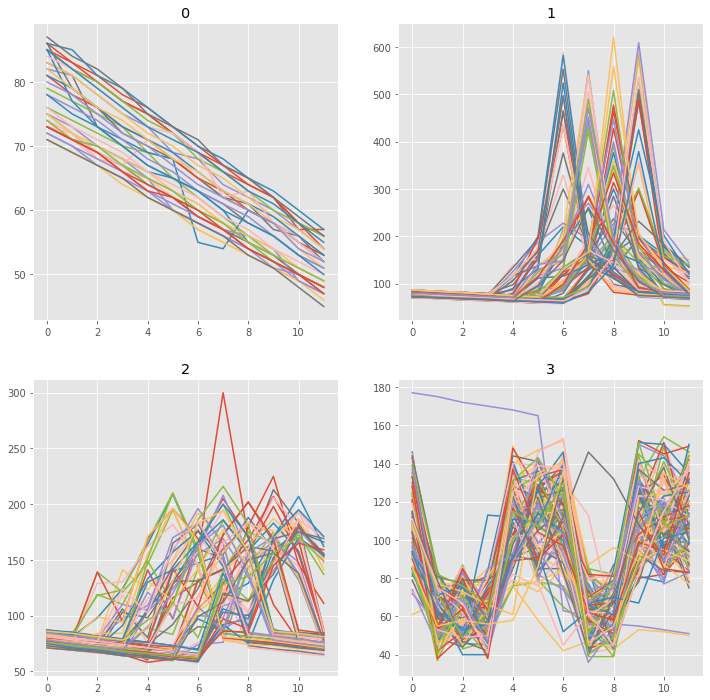

In [0]:
import matplotlib.pyplot as plt

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#Decision Boundary viewer
%matplotlib inline
plt.style.use('ggplot')
import itertools

plotarr = cat_df[columns].values
labelarr = cat_df['結果'].values



#create graph
#2images each row
dev = int((np.max(labelarr)+np.max(labelarr)%2)/2)

plots = []
fig, axes = plt.subplots(nrows=dev, ncols= 2, figsize=(6*2,6*dev))
t = np.arange(0,12)
for i,grid in zip(range(0,np.max(labelarr)),itertools.product(list(range(dev)),[0,1])):
  plot = plotarr[labelarr == i]
  for j in plot:
    axes[grid].plot(t,j[:])
    #axes[grid].xlabel('youbi')
    #axes[grid].ylabel('bell')
    axes[grid].set_title(i)

4.データの正規化

In [0]:
from sklearn.preprocessing import MinMaxScaler

#データ
data = cat_df.values[:,1:-1]
print(data[0].shape)
#ラベル
data_labels = cat_df.values[:,-1:]

#欠損データ
nan = nan_df.values[:,1:-1]
#欠損データラベル
nan_labels = nan_df.values[:,-1:]

#正規化
scaler = MinMaxScaler().fit(data)
data = scaler.transform(data)
nan = scaler.transform(nan)

(12,)


5.npyに出力

In [0]:
#保存ディレクトリ


#データ
np.save(directory+'data/data.npy',data)
np.save(directory+'data/data_labels.npy',data_labels)

#欠損
np.save(directory+'data/nan.npy',nan)
np.save(directory+'data/nan_labels.npy',nan_labels)

#minmaxscaler
from sklearn.externals import joblib
joblib.dump(scaler,directory+'data/scaler.save')

#labelencoder
joblib.dump(le,directory+'data/labelencoder.save')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/drive/My Drive/AI_trial/Trials/KabuPrediction/data/labelencoder.save']